In [1]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape,X_test.shape, y_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

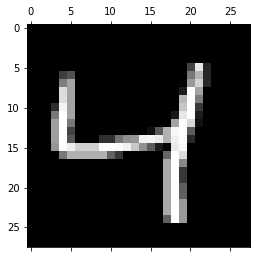

4


In [3]:
plt.matshow(X_train[2], cmap ='gray')
plt.show()
print(y_train[2])

In [4]:
X_train = X_train.reshape(60000,28,28,1)
X_train = X_train.astype('float') /255

print("Before")
print(y_train.shape)
print(y_train[0])

y_train = to_categorical(y_train)

print("After")
print(y_train.shape)
print(y_train[0])

Before
(60000,)
5
After
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=5, strides=1, activation='sigmoid', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=16, kernel_size=5, strides=1, activation='sigmoid', input_shape=(14,14,1)))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Flatten())

model.add(Dense(units=120, activation='sigmoid'))
model.add(Dense(units=84, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [7]:
model.fit(X_train, y_train , epochs=8, batch_size=10, validation_split=0.2)

Epoch 1/8
4800/4800 [==============================] - 46s 3ms/step - loss: 0.5368 - accuracy: 0.8253 - val_loss: 0.1282 - val_accuracy: 0.9596
Epoch 2/8
4800/4800 [==============================] - 15s 3ms/step - loss: 0.1092 - accuracy: 0.9664 - val_loss: 0.0969 - val_accuracy: 0.9705
Epoch 3/8
4800/4800 [==============================] - 14s 3ms/step - loss: 0.0773 - accuracy: 0.9760 - val_loss: 0.0781 - val_accuracy: 0.9758
Epoch 4/8
4800/4800 [==============================] - 14s 3ms/step - loss: 0.0624 - accuracy: 0.9810 - val_loss: 0.0692 - val_accuracy: 0.9780
Epoch 5/8
4800/4800 [==============================] - 14s 3ms/step - loss: 0.0509 - accuracy: 0.9838 - val_loss: 0.0741 - val_accuracy: 0.9787
Epoch 6/8
4800/4800 [==============================] - 14s 3ms/step - loss: 0.0441 - accuracy: 0.9860 - val_loss: 0.0592 - val_accuracy: 0.9824
Epoch 7/8
4800/4800 [==============================] - 14s 3ms/step - loss: 0.0374 - accuracy: 0.9882 - val_loss: 0.0667 - val_accuracy: